# DAT210x - Programming with Python for DS

## Module5- Lab8

In [1]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt

matplotlib.style.use('ggplot') # Look Pretty

### A Convenience Function

This convenience method will take care of plotting your test observations, comparing them to the regression line, and displaying the R2 coefficient

In [2]:
def drawLine(model, X_test, y_test, title):
    fig = plt.figure()
    ax = fig.add_subplot(111)
    ax.scatter(X_test, y_test, c='g', marker='o')
    ax.plot(X_test, model.predict(X_test), color='orange', linewidth=1, alpha=0.7)

    print("Est 2014 " + title + " Life Expectancy: ", model.predict([[2014]])[0])
    print("Est 2030 " + title + " Life Expectancy: ", model.predict([[2030]])[0])
    print("Est 2045 " + title + " Life Expectancy: ", model.predict([[2045]])[0])

    score = model.score(X_test, y_test)
    title += " R2: " + str(score)
    ax.set_title(title)

    plt.show()

### The Assignment

Load up the data here into a variable called `X`. As usual, do a .describe and a print of your dataset and compare it to the dataset loaded in a text file or in a spread sheet application:

In [3]:
# .. your code here ..
X = pd.read_csv('/home/shubham/projects/DAT210x/Module5/Datasets/life_expectancy.csv', sep='\t')
display(X.describe())
display(X.head())
X.isnull().sum()

,Year,WhiteMale,WhiteFemale,BlackMale,BlackFemale
count,40.000000,40.000000,40.000000,40.000000,40.000000
mean,1991.250000,72.730000,78.592500,65.912500,73.262500
std,20.536085,4.968681,5.200561,6.422284,7.157592
min,1900.000000,46.600000,48.700000,32.500000,33.500000
25%,1984.750000,71.800000,78.700000,64.575000,73.400000
50%,1994.500000,73.350000,79.650000,65.250000,73.900000
75%,2004.250000,75.500000,80.500000,69.425000,76.125000
max,2014.000000,76.700000,81.400000,72.500000,78.400000


,Year,WhiteMale,WhiteFemale,BlackMale,BlackFemale
0,1900,46.6,48.7,32.5,33.5
1,1950,66.5,72.2,59.1,62.9
2,1960,67.4,74.1,61.1,66.3
3,1970,68.0,75.6,60.0,68.3
4,1975,69.5,77.3,62.4,71.3


Year           0
WhiteMale      0
WhiteFemale    0
BlackMale      0
BlackFemale    0
dtype: int64

Create your linear regression model here and store it in a variable called `model`. Don't actually train or do anything else with it yet:

In [4]:
# .. your code here ..
from sklearn import linear_model
model = linear_model.LinearRegression()

Slice out your data manually (e.g. don't use `train_test_split`, but actually do the indexing yourself. Set `X_train` to be year values LESS than 1986, and `y_train` to be corresponding 'WhiteMale' age values. You might also want to read the note about slicing on the bottom of this document before proceeding:

In [5]:
# .. your code here ..
X_train = X.Year[X.Year<1986]
X_train.head()
X_test = X.Year[X.Year>=1986]

In [6]:
y_train = X.WhiteMale[X.Year<1986]
display(y_train.head())
y_test = X.WhiteMale[X.Year>=1986]

0    46.6
1    66.5
2    67.4
3    68.0
4    69.5
Name: WhiteMale, dtype: float64

In [7]:
X_train = X_train.reshape(-1, 1)
X_test = X_test.reshape(-1, 1)
y_train = y_train.reshape(-1, 1)
y_test = y_test.reshape(-1, 1)

/home/shubham/anaconda2/lib/python2.7/site-packages/ipykernel_launcher.py:1: FutureWarning: reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead
  """Entry point for launching an IPython kernel.
/home/shubham/anaconda2/lib/python2.7/site-packages/ipykernel_launcher.py:2: FutureWarning: reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead
  
/home/shubham/anaconda2/lib/python2.7/site-packages/ipykernel_launcher.py:3: FutureWarning: reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead
  This is separate from the ipykernel package so we can avoid doing imports until
/home/shubham/anaconda2/lib/python2.7/site-packages/ipykernel_launcher.py:4: FutureWarning: reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead
  after removing the cwd from sys.path.


Train your model then pass it into `drawLine` with your training set and labels. You can title it 'WhiteMale'. `drawLine` will output to the console a 2014 extrapolation / approximation for what it believes the WhiteMale's life expectancy in the U.S. will be... given the pre-1986 data you trained it with. It'll also produce a 2030 and 2045 extrapolation:

('Est 2014 WhiteMale Life Expectancy: ', array([ 80.85635426]))
('Est 2030 WhiteMale Life Expectancy: ', array([ 85.39349384]))
('Est 2045 WhiteMale Life Expectancy: ', array([ 89.6470622]))


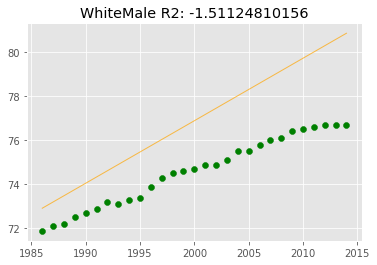

In [8]:
# .. your code here ..
model.fit(X_train,y_train)
drawLine(model, X_test, y_test, title='WhiteMale')

Print the actual 2014 'WhiteMale' life expectancy from your loaded dataset

In [20]:
# .. your code here ..
print(X.WhiteMale[X.Year == 2014])

39    76.7
Name: WhiteMale, dtype: float64


Repeat the process, but instead of for WhiteMale, this time select BlackFemale. Create a slice for BlackFemales, fit your model, and then call `drawLine`. Lastly, print out the actual 2014 BlackFemale life expectancy:

/home/shubham/anaconda2/lib/python2.7/site-packages/ipykernel_launcher.py:7: FutureWarning: reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead
  import sys
/home/shubham/anaconda2/lib/python2.7/site-packages/ipykernel_launcher.py:8: FutureWarning: reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead
  
/home/shubham/anaconda2/lib/python2.7/site-packages/ipykernel_launcher.py:9: FutureWarning: reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead
  if __name__ == '__main__':
/home/shubham/anaconda2/lib/python2.7/site-packages/ipykernel_launcher.py:10: FutureWarning: reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead
  # Remove the CWD from sys.path while we load stuff.


('Est 2014 BlackFemale Life Expectancy: ', array([ 88.6988994]))
('Est 2030 BlackFemale Life Expectancy: ', array([ 96.11438808]))
('Est 2045 BlackFemale Life Expectancy: ', array([ 103.06640871]))


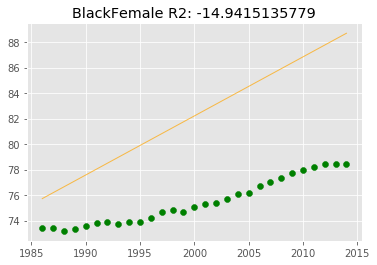

39    78.4
Name: BlackFemale, dtype: float64


In [22]:
# .. your code here .. 
X_train = X.Year[X.Year < 1986]
X_test = X.Year[X.Year >= 1986]
y_train = X.BlackFemale[X.Year < 1986]
y_test = X.BlackFemale[X.Year >= 1986]

X_train = X_train.reshape(-1, 1)
X_test = X_test.reshape(-1, 1)
y_train = y_train.reshape(-1, 1)
y_test = y_test.reshape(-1, 1)

model = linear_model.LinearRegression()

model.fit(X_train, y_train)

drawLine(model, X_test, y_test, title='BlackFemale')

print(X.BlackFemale[X.Year == 2014])

Lastly, print out a correlation matrix for your entire dataset, and display a visualization of the correlation matrix, just as we described in the visualization section of the course:

In [ ]:
# .. your code here ..

In [ ]:
plt.show()

### Notes On Fitting, Scoring, and Predicting:

Here's a hint to help you complete the assignment without pulling your hair out! When you use `.fit()`, `.score()`, and `.predict()` on your model, SciKit-Learn expects your training data to be in spreadsheet (2D Array-Like) form. This means you can't simply pass in a 1D Array (slice) and get away with it.

To properly prep your data, you have to pass in a 2D Numpy Array, or a dataframe. But what happens if you really only want to pass in a single feature?

If you slice your dataframe using `df[['ColumnName']]` syntax, the result that comes back is actually a _dataframe_. Go ahead and do a `type()` on it to check it out. Since it's already a dataframe, you're good -- no further changes needed.

But if you slice your dataframe using the `df.ColumnName` syntax, OR if you call `df['ColumnName']`, the result that comes back is actually a series (1D Array)! This will cause SKLearn to bug out. So if you are slicing using either of those two techniques, before sending your training or testing data to `.fit` / `.score`, do `any_column = my_column.reshape(-1,1)`. 

This will convert your 1D array of `[n_samples]`, to a 2D array shaped like `[n_samples, 1]`. A single feature, with many samples.

If you did something like `my_column = [my_column]`, that would produce an array in the shape of `[1, n_samples]`, which is incorrect because SKLearn expects your data to be arranged as `[n_samples, n_features]`. Keep in mind, all of the above only relates to your `X` or input data, and does not apply to your `y` or labels.